In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
def sigmoid(x):
    
    s = 1/(1+np.exp(-x))
    return s

In [12]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta #why 3.12?
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)] # c_ is concatanation
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [17]:
a=range(2*5,2*(5+1))

In [21]:
a

range(10, 12)

In [4]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N,2), np.random.rand(N,2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [5]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [6]:
for z in range(10):
    print(z)

0
1
2
3
4
5
6
7
8
9


In [7]:
X,Y = load_planar_dataset()

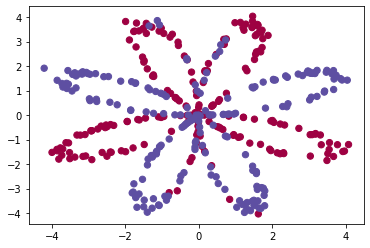

In [11]:
plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral)

In [22]:
X.shape, Y.shape

((2, 400), (1, 400))

In [23]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\vinniiee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1.0, 'Logistic Regression')

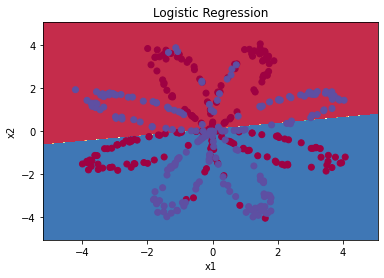

In [24]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

In [27]:
LR_predictions = clf.predict(X.T)
print ('Accuracy  - logistic regression: %d ' %float((np.dot(Y,LR_predictions) +np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +'% ' )

Accuracy  - logistic regression: 47 % 


In [29]:
q=[1,2,3]
w=[4,5,6]

In [30]:
np.dot(q,w)

32

In [37]:
w=np.array(w.T)

In [39]:
q*w

array([ 4, 10, 18])

In [41]:
type(w)

numpy.ndarray

In [42]:
type(q)

list

In [43]:
w*q

array([ 4, 10, 18])

In [44]:
q*w

array([ 4, 10, 18])

In [47]:
#%DEFINING NEURAL NETWORK STRUCTURE

def layer_sizes(X,Y):
        
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
        
    return (n_x, n_h, n_y)

In [62]:
#% INITIALIZING MODELS'S PARAMETERS

def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    paras = { "W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2, }
    
    return paras

In [169]:
#% IMPLEMENTATION OF FORWARD PROPOGATION

def forward_propagation(X, paras):
    
    W1 = paras["W1"]
    b1 = paras["b1"]
    W2 = paras["W2"]
    b2 = paras["b2"]
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2,
    }
    
    return A2 , cache

In [85]:
#% IMPLEMENTATON OF COST FUNCTION

def compute_cost(A2, Y, paras):
    
    m = Y.shape[1]
    
    logprobs = ((np.log(A2))*Y)+((np.log(1-A2))*(1-Y))
    cost = - np.sum(logprobs)/m
    cost = np.squeeze(cost)
    
    return cost

In [86]:
np.squeeze(q)

array([1, 2, 3])

In [98]:
w = np.array([[1,2,3],[4,5,6]])
w
np.sum(w)

21

In [90]:
q= np.array(q)

In [78]:
q

array([1, 2, 3])

In [79]:
np.multiply(q,w)

array([ 4, 10, 18])

In [80]:
q*w

array([ 4, 10, 18])

In [81]:
(np.log(q))*w

array([0.        , 3.4657359 , 6.59167373])

In [171]:
#% IMPLEMENTATION OF BACKWARD PROPOGATION

def backward_propagation(paras, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = paras["W1"]
    W2 = paras["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    
    grads= {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
    
    return grads 

In [5]:
q = np.array([1,2,3])
np.power(q,2)

array([1, 4, 9], dtype=int32)

In [177]:
#% UPDATING PARAMETERS AFTER COMPLETION OF EACH FPRWARD AND BACKWARD PROPOGATION

def update_parameters(parameters, grads, alpha = 1.2):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1-alpha*dW1
    b1 = b1-alpha*db1
    W2 = W2-alpha*dW2
    b2 = b2-alpha*db2
    
    paras = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return paras

In [167]:
#% MODEL SEGREGATION FOR NEURAL NETWORK

def nn_model(X, Y, n_h, num_iter = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    #Initialising Parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #Gradient Descent Loop
    for i in range(0, num_iter):
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i %1000==0:
            print("Cost after {} iterations: {}".format(i,cost))
            
    return parameters

In [105]:
layer_sizes(q,w)

(3, 4, 2)

In [107]:
layer_sizes?

In [179]:
#% Prediction Function
def predict(parameters, X):
    
    A2, cache = forward_propogation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

Cost after 0 iterations: 0.6930480201239823
Cost after 1000 iterations: 0.28808329356901846
Cost after 2000 iterations: 0.25438549407324546
Cost after 3000 iterations: 0.23386415038952202
Cost after 4000 iterations: 0.2267924874485401
Cost after 5000 iterations: 0.2226442754929902
Cost after 6000 iterations: 0.21973140404281322
Cost after 7000 iterations: 0.21750365405131297
Cost after 8000 iterations: 0.219528426834015
Cost after 9000 iterations: 0.21862727554078742
Accuracy: 90%


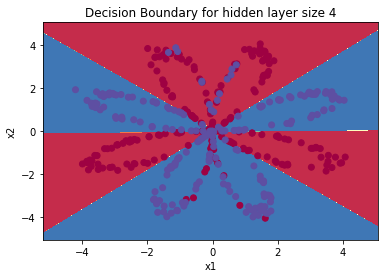

In [191]:
#% !!!!!!!!!!!!! MODEL TEST RUN !!!!!!!!!!!!!!!!

#building a model
parameters = nn_model(X, Y, n_h = 4, num_iter = 10000, print_cost = True)

#plotting decsion boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) +np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %


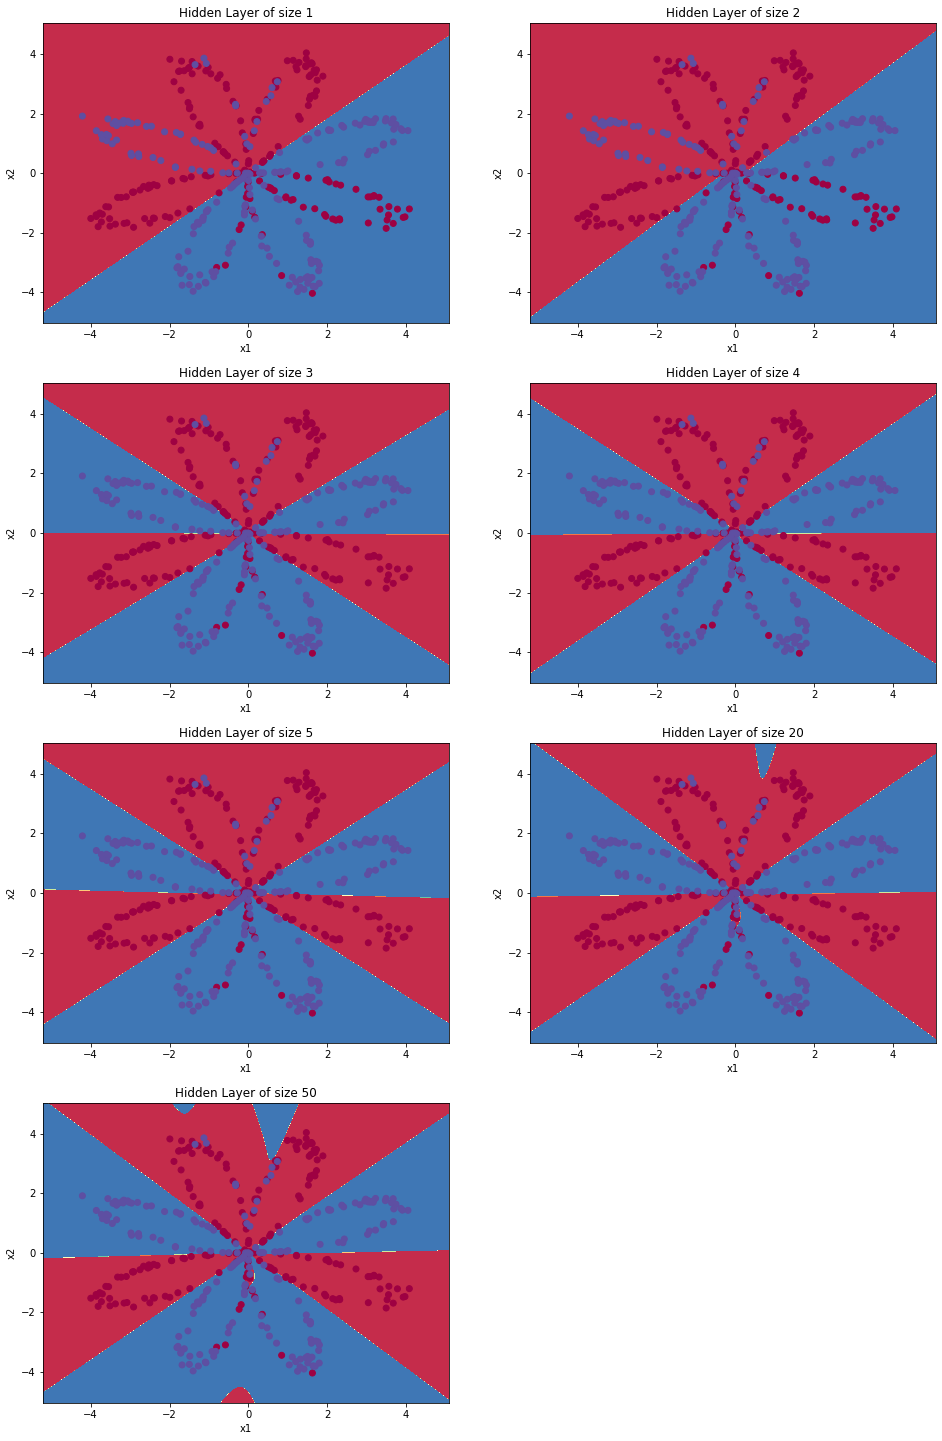

In [195]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iter = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) +np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))